# Recurrent Neural Networks

## Why Sequence Models

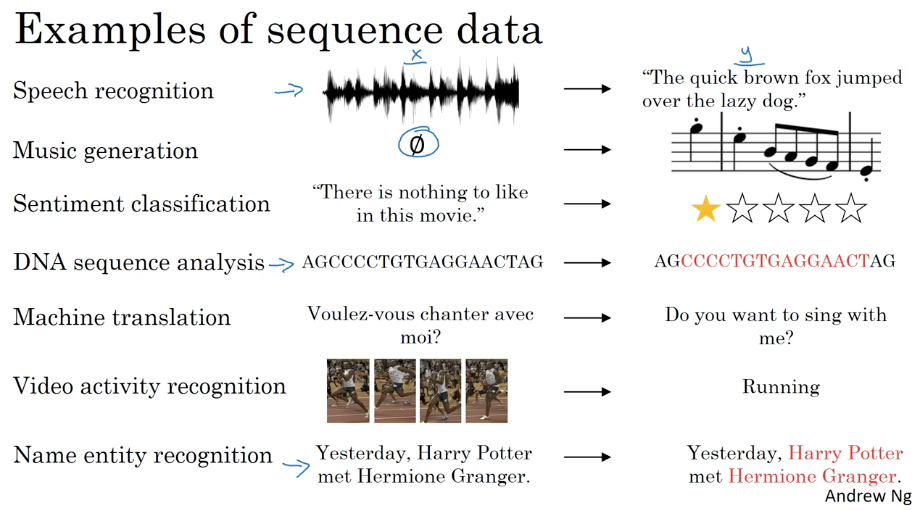

## Notation
- Previously, we have defined $x^{(i)}$ and $y^{(i)}$ as the $i^{th}$ input and the $i^{th}$ output.
- For sequence data, we define $x^{(i)<t>}$ as the $t^{th}$ element of the $i^{th}$ input and $y^{(i)<t>}$ as the $t^{th}$ element of the $i^{th}$ output.
- In addition, we define $T_{x}^{(i)}$ and $T_{y}^{(i)}$ as the length of the $i^{th}$ input and output.

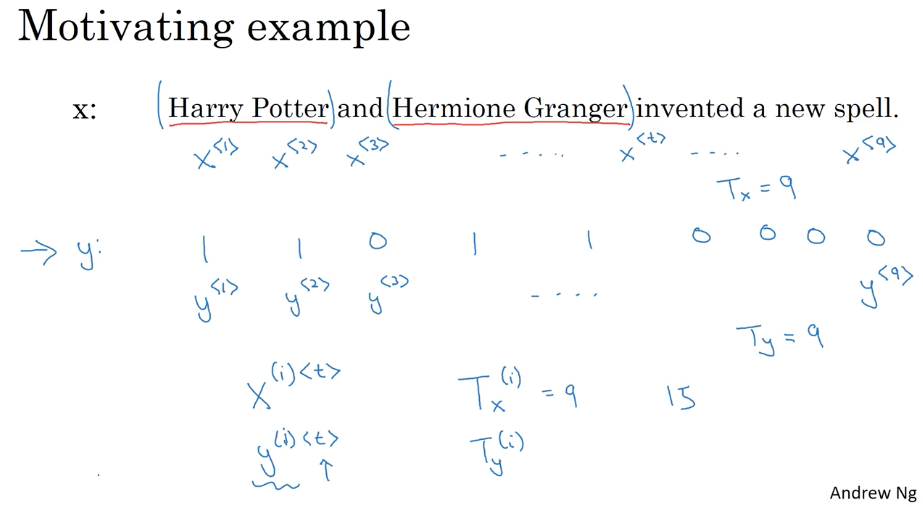

- To represent words, we can construct a dictionary of vocabulary and then one-hot encode each word using the dictionary.
    - You can also create a token for "unkown" vocabulary in the dictionary so that you can still create one-hot vectors for words that are not in the dictionary.
    
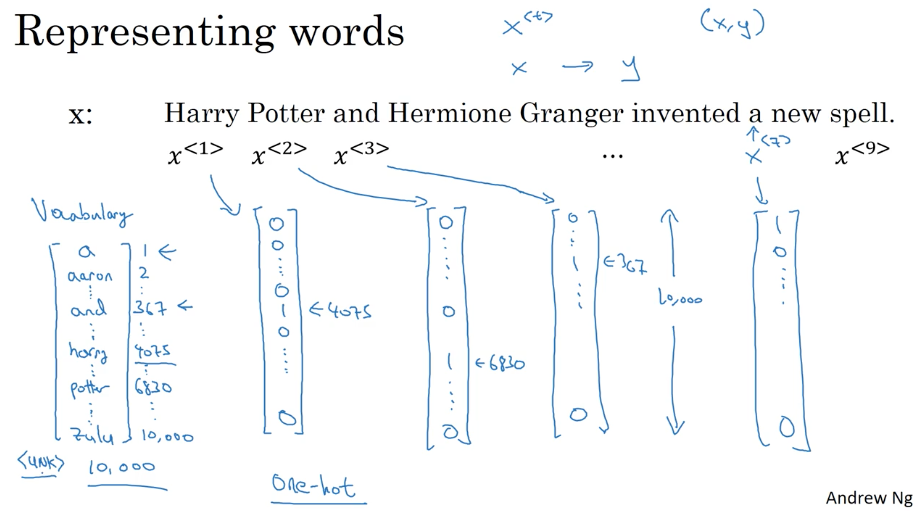

## Recurrent Neural Network Model

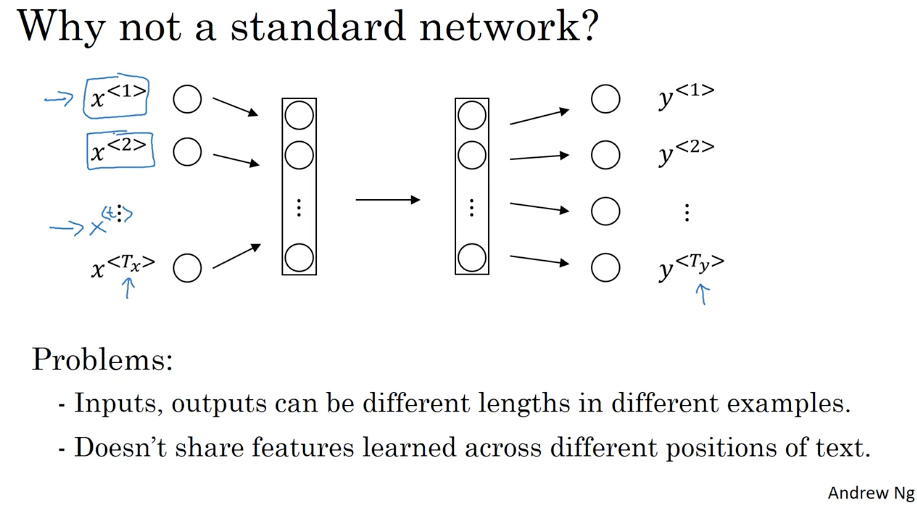

- In a **recurrent neural network (RNN)**, the model reads in the sequence data from left to right (or in some other defined orders) and generates predictions for each element sequentially, and activations are passed from the previous step to the next step, while the same set of parameters is shared across all steps.
    - Such a **uni-directional RNN** architecture at leaset allows the model to use information learned from previous elements in predicting the following elements.
    - The **bidirectional RNN (BRNN)** architecture would even allow the model to use information learned from both previous and later elements for predicting the current element.

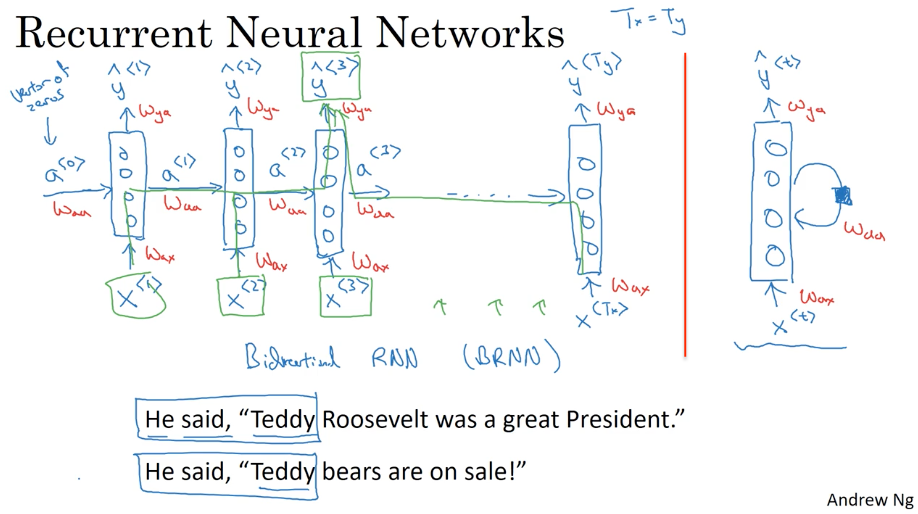

- Forward Propagation
    - From step 0 to step 1:
        - Initialize $a^{<0>} = \vec 0$
        - $a^{<1>} = g_{1} (W_{aa}a^{<0>} + W_{ax}x^{<1>} + b_{a})$
        - $y^{<1>} = g_{2} (W_{ya}a^{<1>} + b_{y})$
    - More generally:
        - $a^{<t>} = g_{1} (W_{aa}a^{<t-1>} + W_{ax}x^{<t>} + b_{a})$
        - $y^{<t>} = g_{2} (W_{ya}a^{<t>} + b_{y})$
        
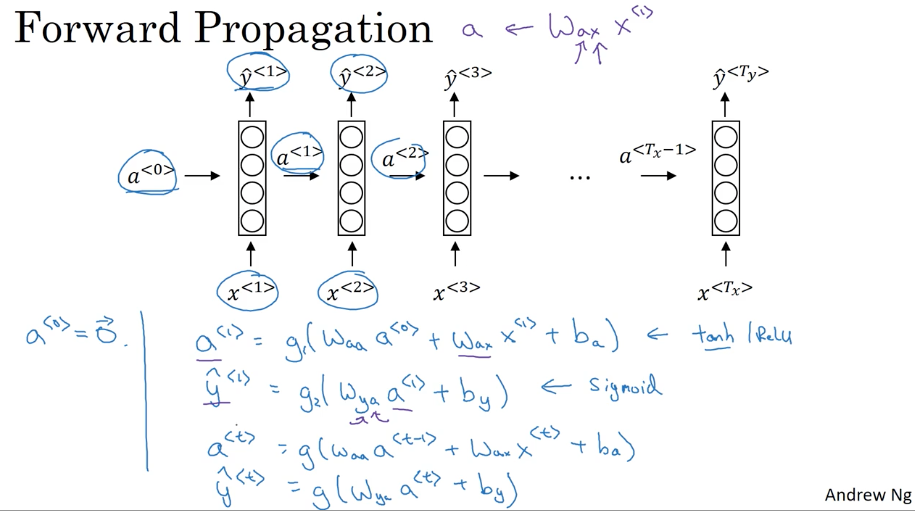

- Simplified Notation
    - Let $W_{a} = \begin{bmatrix} W_{aa} & W_{ax} \end{bmatrix} $
    - Let $[a^{<t-1>}, x^{<t>}] = \begin{bmatrix} a^{<t-1>} \\ x^{<t>} \end{bmatrix}$
    - Also denote $W_{y} = W_{ya}$
    - Then we have:
        - $a^{<t>} = g_{1} (W_{a} [a^{<t-1>}, x^{<t>}] + b_{a})$
        - $y^{<t>} = g_{2} (W_{y}a^{<t>} + b_{y})$
        
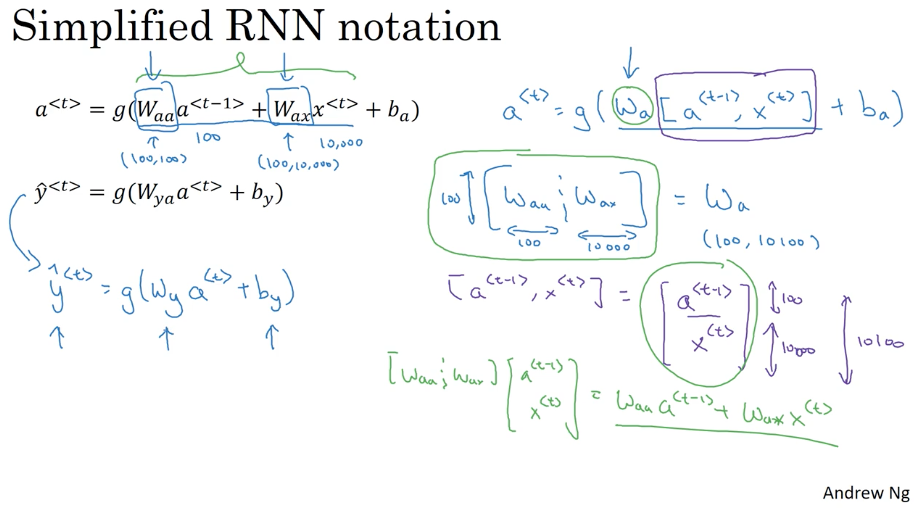

## Backpropagation Through Time
- Loss Function
    - For each step (element)
        - $L^{<t>} (\hat y^{<t>}, y^{<t>}) = -y^{<t>} log \hat y^{<t>} - (1 - y^{<t>}) log (1-\hat y^{<t>})$
    - For the entire sequence
        - $L(\hat y, y) = \sum_{t=1}^{T_{y}} L^{<t>} (\hat y^{<t>}, y^{<t>})$
        
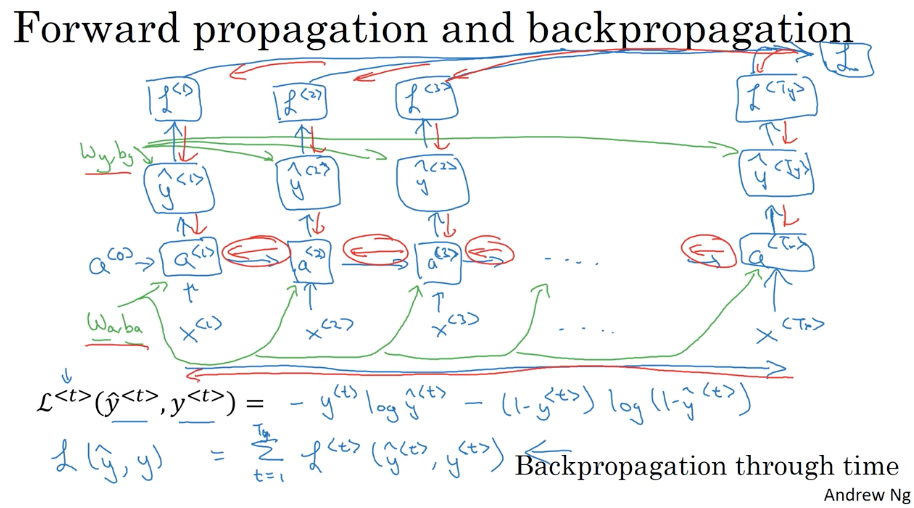

## Different Types of RNNs
- Keep in mind that in many cases the length of input sequence $T_{x}$ is NOT equal to the length of output $T_{y}$.

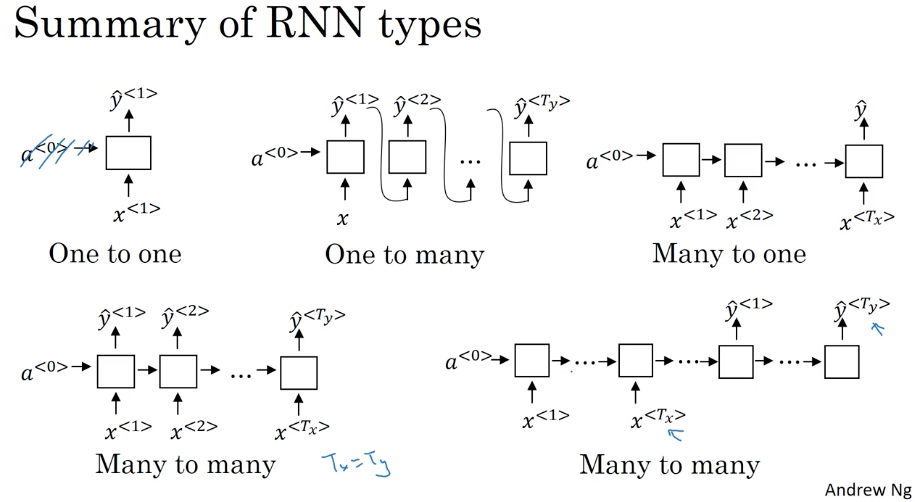

## Language Model and Sequence Generation
- To build a language RNN model, we need a dictionary containing a certain amount of commonly used words.
- First, we use a softmax activation function to generate $\hat y^{<1>}$, which outputs the possibility of $y^{<1>}$ to be each of the words in the dictionary.
- Then, we use preceding words to predict the conditional distribution of the next word.

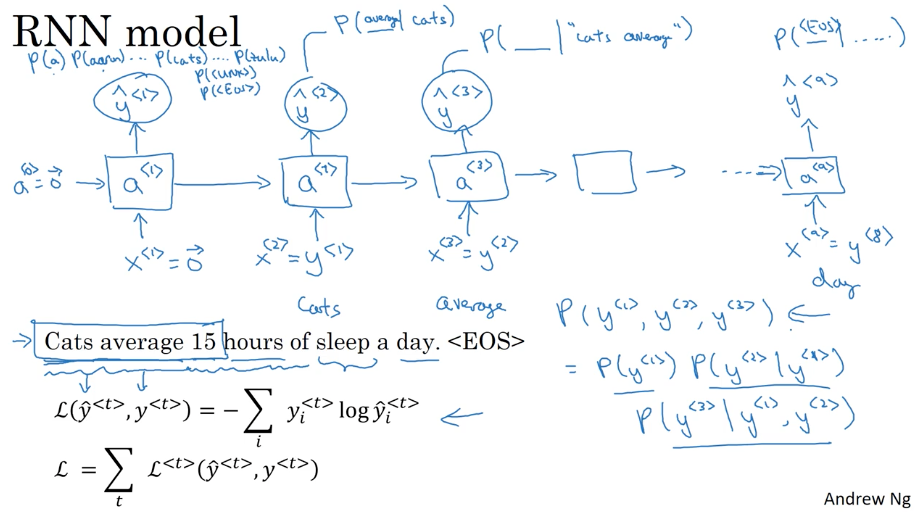

## Sampling Novel Sequences
- When training a language RNN model, the inputs are words and outputs are the distribution (conditional distributions) of vocabularies.
- When generating novel sequences from a trained RNN, we do the opposite by randomly sampling words based on distributions of vocabularies.

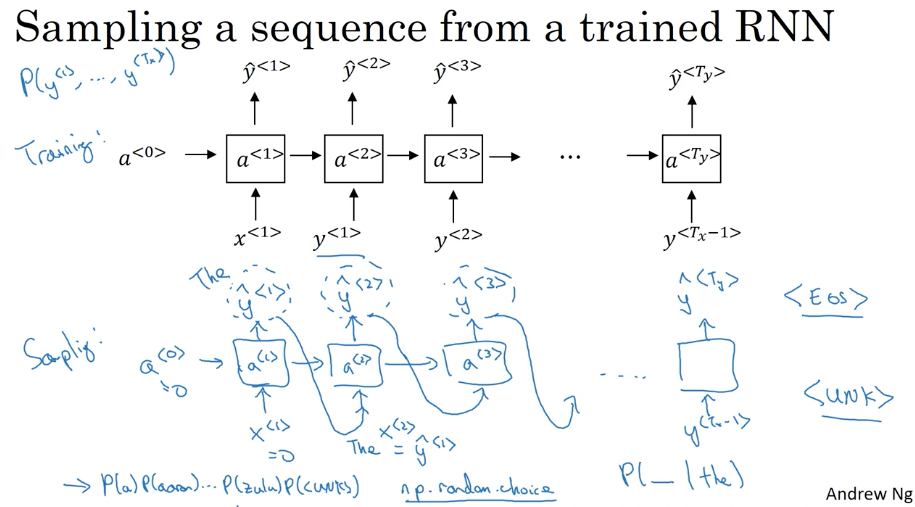

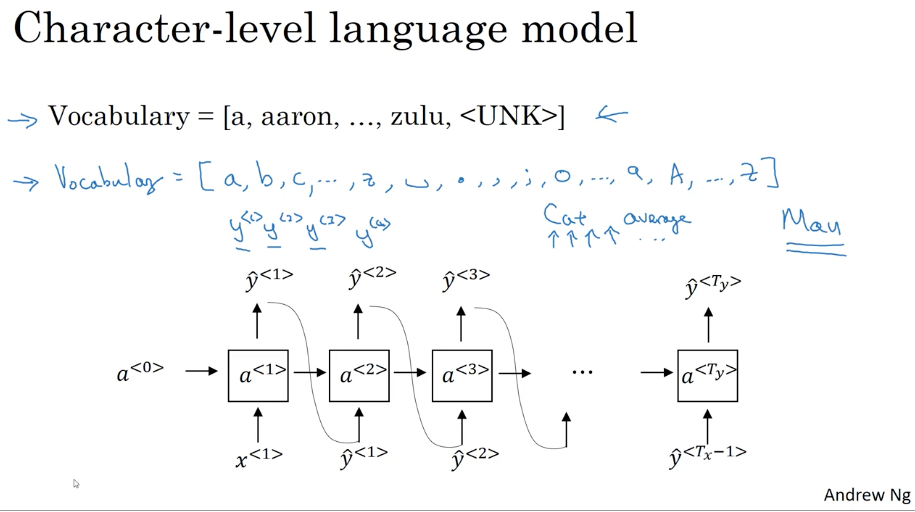

## Vanishing Gradients with RNNs
- It's not a rare case to have a long sequence input (e.g. a long sentence).
- As a result, the RNN model is very deep in layers and thus may face problems of **vanishing/expoding gradients**.
    - Exploding gradients is easier to solve, as you could apply **gradient clipping** which sets a hard maximum threshold to the maximum gradients.
    
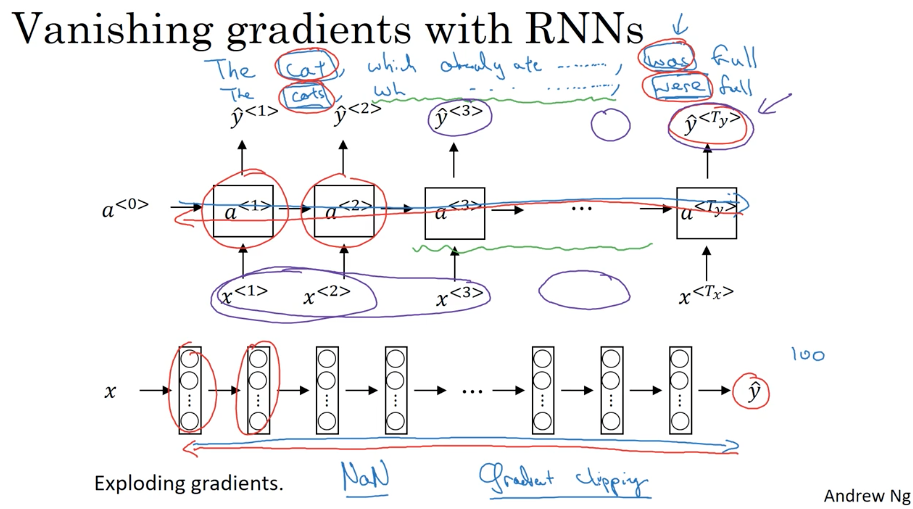

## Gated Recurrent Unit (GRU)
- The Gated Recurrent Unit (GRU) is a modification to the RNN hidden layer that makes it much better capturing long range connections and helps a lot with vanishing gradient problems.

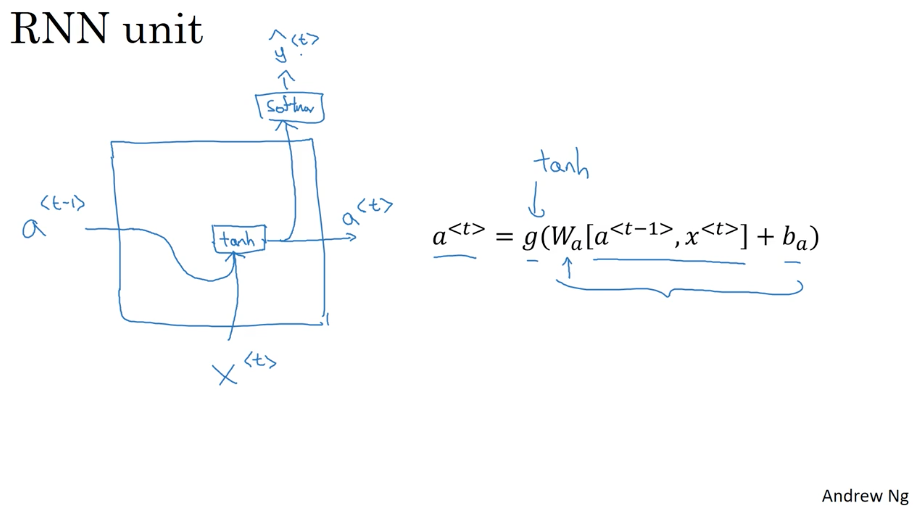

- **GRU (Simplified)**
    - Define **memory cell** 
        - $c^{<t>}$ (for now, assume $c^{<t>} = a^{<t>}$)
    - For each step, consider overwritting $c^{<t>}$ with a new candidate: 
        - $\tilde c^{<t>} = tanh(W_{c} [c^{<t-1>}, x^{<t>}] + b_{c})$
    - Define the **gate function**: 
        - $\Gamma_{u} = \sigma(W_{u} [c^{<t-1>}, x^{<t>}] + b_{u})$
    - Putting them together, we have:
        - $c^{<t>} = \Gamma_{u} \odot \tilde c^{<t>} + (1 - \Gamma_{u}) \odot c^{<t-1>}$
- The gate function controls whether $c^{<t>}$ is overwritten on each step, and thus controlling what information is remembered and passed to later steps.
    - In the example below, assume $\Gamma_{u} = 1$ and $c^{<t>} = 1$ for the word "cat", but $\Gamma_{u} = 0$ and $c^{<t>} = 0$ for all words between after "cat". 
    - In this way, $c^{<t>} = 1$ will never be overwritten along the sentence, thus telling the model to use "was" instead of "were" as "cat" has been remembered.
- Note that the gate function value $\Gamma_{u}$ could often be very close to 0.
    - However, when $\Gamma_{u} \approx 0$, the GRU sets $c^{<t>} \approx c^{<t-1>}$.
    - Thus the GRU is able to pass along the value along a very long sequence input and avoid the vanishing gradient problems for $W_{u}$.
    
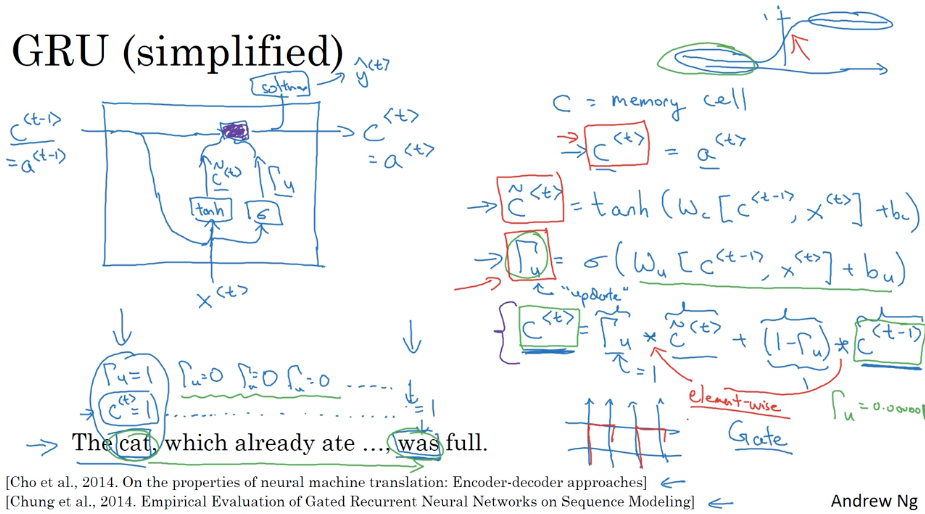

- **Full GRU**
    - $\tilde c^{<t>} = tanh(W_{c} [\Gamma_{r} \odot c^{<t-1>}, x^{<t>}] + b_{c})$
    - $\Gamma_{r} = \sigma(W_{r} [c^{<t-1>}, x^{<t>}] + b_{r})$
    - $\Gamma_{u} = \sigma(W_{u} [c^{<t-1>}, x^{<t>}] + b_{u})$
    - $c^{<t>} = \Gamma_{u} \odot \tilde c^{<t>} + (1 - \Gamma_{u}) \odot c^{<t-1>}$ 

## Long Short Term Memory (LSTM)
- **LSTM**
    - $\tilde c^{<t>} = tanh(W_{c} [a^{<t-1>}, x^{<t>}] + b_{c})$
    - Update Gate
        - $\Gamma_{u} = \sigma(W_{u} [a^{<t-1>}, x^{<t>}] + b_{u})$
    - Forget Gate
        - $\Gamma_{f} = \sigma(W_{f} [a^{<t-1>}, x^{<t>}] + b_{f})$
    - Output Gate
        - $\Gamma_{o} = \sigma(W_{o} [a^{<t-1>}, x^{<t>}] + b_{o})$
    - $c^{<t>} = \Gamma_{u} \odot \tilde c^{<t>} + \Gamma_{f} \odot c^{<t-1>}$
    - $a^{<t>} = \Gamma_{o} \odot tanh(c^{<t>})$ 
- Another variation is to add $c^{<t-1>}$ into the calculations of $\Gamma_{u}, \Gamma_{f}, \Gamma_{o}$, which is called **peophole connection**. 

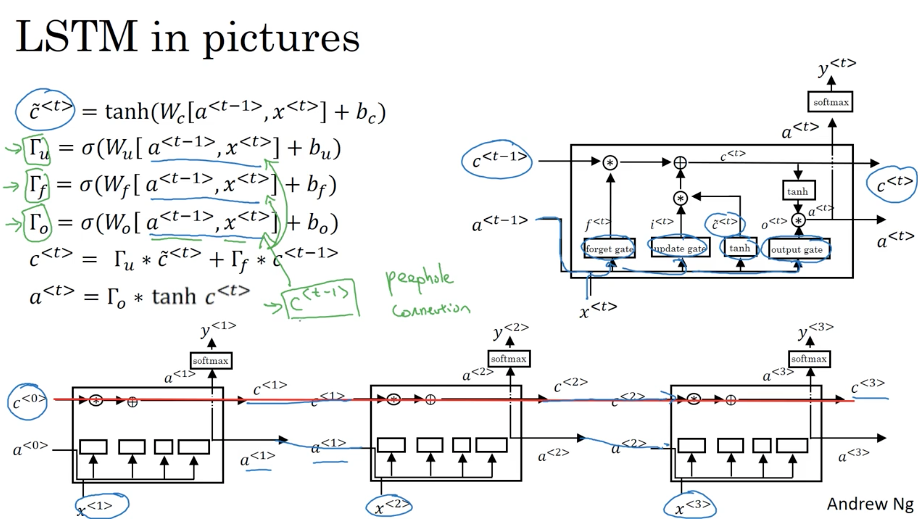

## Bidirectional RNN (BRNN)
- In the uni-directional RNN, we construct a sequence model by connecting a group of forward-passing recurring units (e.g. GRU, LSTM, etc.) together.
- In a BRNN, we have both a group of forward-passing recurring units and a group of backward-passing units.
- For each prediction, we are taking information from both preceeding and following elements in the sequence.
    - $\hat y^{<t>} = g(W_{y} [\overrightarrow a^{<t>}, \overleftarrow a^{<t>}] + b_{y})$
- The disadvantage of the BRNN is that you need to have the entire sequence of input to be able to make predictions anywhere.
    
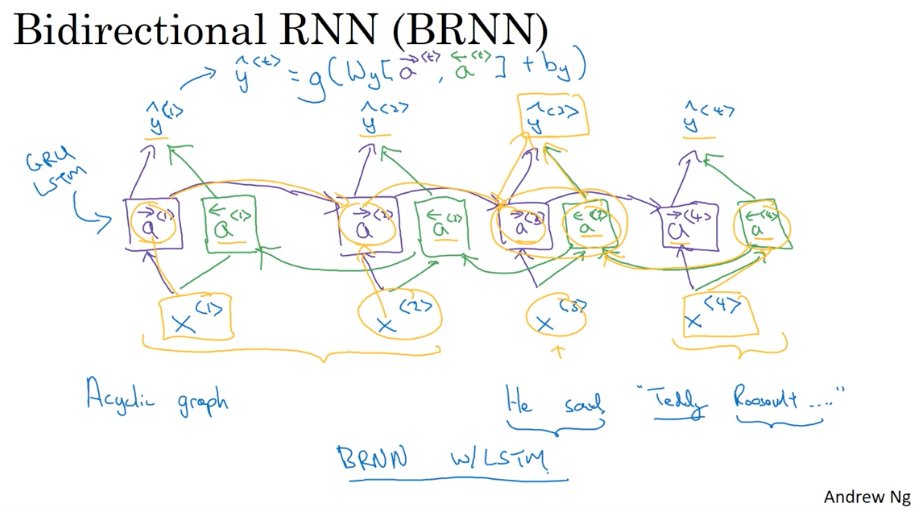

## Deep RNNs
- To construct a deep RNN, we "vertically" stack multiple layers of RNNs together.
    - Keep in mind that the same set of parameters $W_{a}^{[l]}, b_{a}^{[l]}$ is shared across steps on the same layer.
    - But layers on the "vertical" direction have different sets of parameters.
    
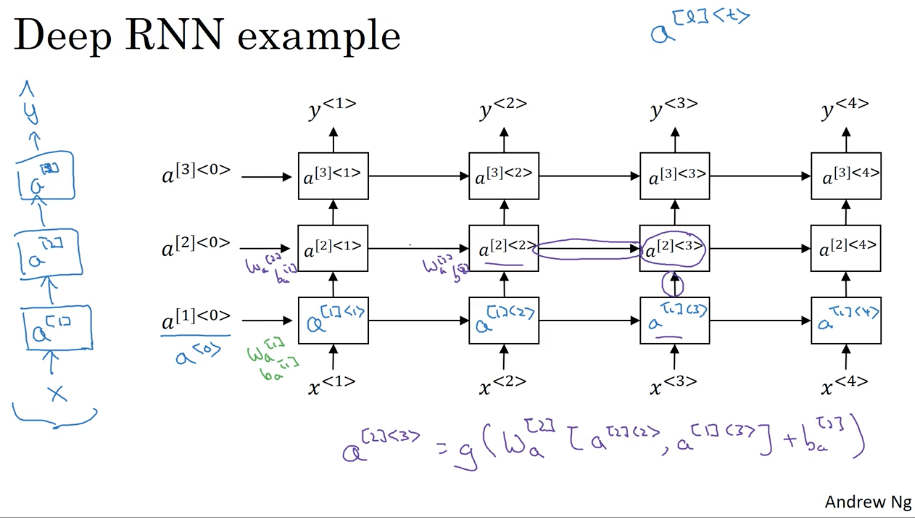

- Because training a deep RNN is very computationally expensive, people sometimes stop adding "horizontal" connections across when the network gets deeper.

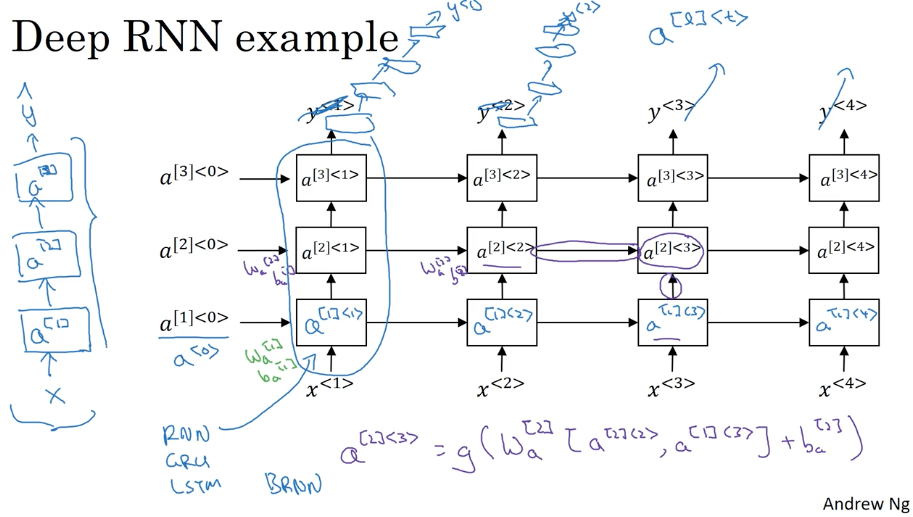